In [84]:
import numpy as np
import gzip
import urllib.request
import pickle
import os
import matplotlib.pyplot as plt

#Softmax Function

In [2]:
def softmax(a):
    return np.exp(a)/np.sum(np.exp(a))

#New version of softmax function 

In [4]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)


In [85]:
image_size = 28*28
dataset_dir = 'dataset'
dataset_pkl = 'mnist.pkl'
url_base = 'http://jrkwon.com/data/ece5831/mnist/'

In [100]:
key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

In [107]:
key_file['train_images']

'train-images-idx3-ubyte.gz'

In [101]:
def _download(file_name):
    file_path = dataset_dir + '/' + file_name

    if (os.path.exists(file_path)):
        print(f'File: {file_name} already exists.')
        return
    print(f'Downloading {file_name}...')
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print('done')

In [102]:
def _download_all():
    for file_name in key_file.values():
        _download(file_name)

In [103]:
def _load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, image_size)

    return images


In [104]:
images = _load_images(dataset_dir + '/' + key_file['test_images'])

In [105]:
images.shape

(10000, 784)

In [52]:
idx = 1000

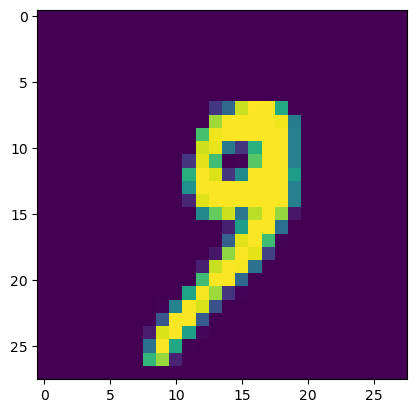

In [92]:
a = images[idx].reshape(28,28)
plt.imshow(a)

In [93]:
def _load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return labels

In [94]:
labels = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

In [95]:
labels[idx]

9

In [114]:
def _create_dataset():
    dataset = {}
    dataset['train_images'] = _load_images(f"{dataset_dir}/{key_file['train_images']}")
    dataset['train_labels'] = _load_labels(f"{dataset_dir}/{key_file['train_labels']}")
    dataset['test_images'] = _load_images(f"{dataset_dir}/{key_file['test_images']}")
    dataset['test_labels'] = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")
    
    with open(f'{dataset_dir}/{dataset_pkl}', 'wb') as f:
        print(f'Pickle: {dataset_dir}/{dataset_pkl} is being created')
        pickle.dump(dataset, f)
        print('Done')
    return dataset

In [108]:
dataset = _create_dataset()

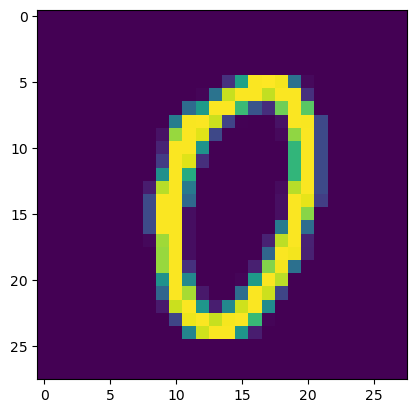

In [109]:
img = dataset['train_images'][idx].reshape(28,28)
plt.imshow(img)

 Label: 9


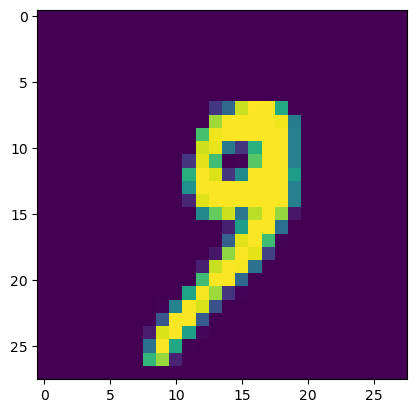

In [99]:
plt.imshow(dataset['test_images'][idx].reshape(28,28))
print(f" Label: {dataset['test_labels'][idx]}")

In [110]:
def _change_one_hot_label(y, num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    
    return t

In [111]:
y = np.array([1, 0, 9, 8])
one_hot_y = _change_one_hot_label(y,10)

In [115]:
print(y)
print(one_hot_y)

[1 0 9 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [123]:
def _init_dataset():
    _download_all()
    if os.path.exists(f'{dataset_dir}/{dataset_pkl}'):
        with open(f'{dataset_dir}/{dataset_pkl}', 'rb') as f:
            print(f'Pickle: {dataset_dir}/{dataset_pkl} already exists.')
            print('loading....')
            dataset = pickle.load(f)
            print('Done')

    else:
        dataset = _create_dataset()

    return dataset

In [124]:
_init_dataset()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


{'train_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'train_labels': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'test_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test_labels': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)}

In [1]:
dataset = {}

In [46]:
import numpy as np
import gzip
import urllib.request
import pickle
import os
import matplotlib.pyplot as plt

In [47]:
class MnistData():

    image_size = 28*28
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/'

    key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = f'{self.dataset_dir}/{self.dataset_pkl}'

        self._init_dataset()

    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        
        return t

    def _download(self, file_name):
        file_path = self.dataset_dir + '/' + file_name

        if (os.path.exists(file_path)):
            print(f'File: {file_name} already exists.')
            return
        
        print(f'Downloading {file_name}...')
        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print('done')
    
    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)

    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)

        return images
    
    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)

        return labels
    
    def _create_dataset(self):
       
        self.dataset['train_images'] = self._load_images(f"{dataset_dir}/{key_file['train_images']}")
        self.dataset['train_labels'] = self._load_labels(f"{dataset_dir}/{key_file['train_labels']}")
        self.dataset['test_images'] = self._load_images(f"{dataset_dir}/{key_file['test_images']}")
        self.dataset['test_labels'] = self._load_labels(f"{dataset_dir}/{key_file['test_labels']}")
        
        with open(f'{self.dataset_pkl_path}', 'wb') as f:
            print(f'Pickle: {self.dataset_dir}/{self.dataset_pkl} is being created')
            pickle.dump(self.dataset, f)
            print('Done')

    def _init_dataset(self):
        self._download_all()
        if os.path.exists(f'{self.dataset_dir}/{self.dataset_pkl}'):
            with open(f'{self.dataset_dir}/{self.dataset_pkl}', 'rb') as f:
                print(f'Pickle: {self.dataset_dir}/{self.dataset_pkl} already exists.')
                print('loading....')
                self.dataset = pickle.load(f)
                print('Done')

        else:
            dataset = _create_dataset()

    def load(self):
        # normalize image datasets
        for key in ('train_images','test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0
        
        # One-hot encoding
        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['test_images'], self.dataset['train_labels']), \
            (self.dataset['test_images'], self.dataset['test_labels'])



In [48]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [49]:
test_images.shape

(10000, 784)

#testing

 Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


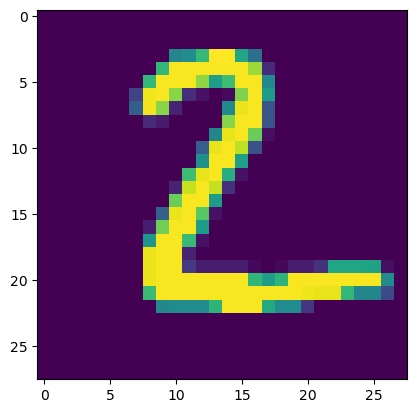

In [51]:
plt.imshow(mnist_data.dataset['test_images'][1].reshape(28,28))
print(f" Label: {mnist_data.dataset['test_labels'][1]}")

 Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


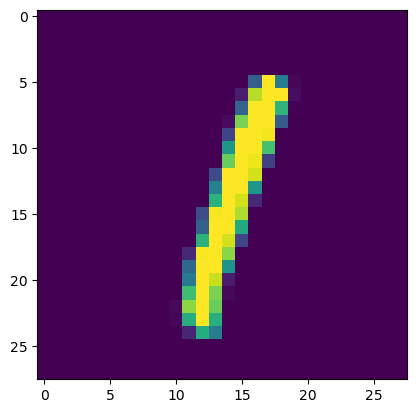

In [52]:
plt.imshow(mnist_data.dataset['test_images'][5].reshape(28,28))
print(f" Label: {mnist_data.dataset['test_labels'][5]}")

 Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


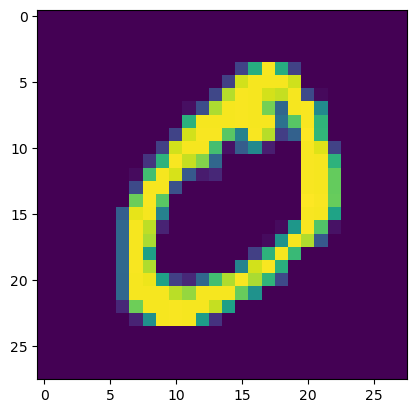

In [53]:
plt.imshow(mnist_data.dataset['train_images'][1].reshape(28,28))
print(f" Label: {mnist_data.dataset['train_labels'][1]}")

 Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


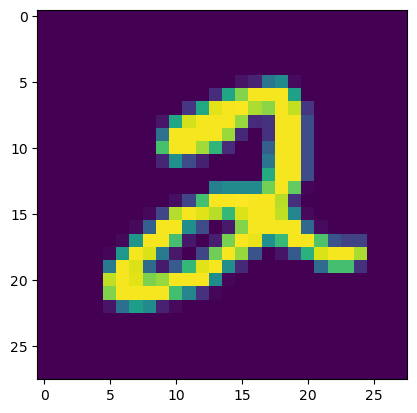

In [54]:
plt.imshow(mnist_data.dataset['train_images'][5].reshape(28,28))
print(f" Label: {mnist_data.dataset['train_labels'][5]}")